# **Data Analytics on Insurance Data**

In [1]:
# import the required libraries
# import NumPy(Numerical Python)
# this library can help you to do the numerical operation or mapping on the data structures like list,tuple,arrary,dict..etc
import numpy as np

# import pandas
# this library can help us to convert different extension files into pandas data frame like csv to pandas data frame
import pandas as pd

# import seaborn
# this library can help us to visualize the differnt graphs
import seaborn as sns

# import matplotlib
# this library also help us to create graphs
import matplotlib.pyplot as plt


In [2]:
# load the data into colab
# import the files
from google.colab import files

In [3]:
# upload the file
uploaded= files.upload()

Saving insurance1.csv to insurance1.csv


In [4]:
# import the io
import io

# store the data in df_insurance
df_insurance= pd.read_csv(io.BytesIO(uploaded['insurance1.csv']))

In [5]:
# show the data
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# show the last 5 observations
df_insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# **Data Overview**

In [7]:
# show the shape of the data
df_insurance.shape

(1338, 7)

In [8]:
# interpretation
# we have 1338 observations(rows)
# we have 7 attributes(columns)


In [9]:
# show the data types of the data
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# interpretation
# we have 4 numerical columns and 3 categorical columns
# we are using the storage of approx 73.3 KB
# we dont have the null values in the data

In [11]:
# Know our columns
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
#interpretation
# Age: Age of the insurance owner
# Sex: Gender of the insurance owner
# BMI: BMI of the insurance owner
# children: Number of childrens cover in insurance
# smoker: weather the insurance owner is smoker or not
# region: Region where insurance owner belongs to
# charges: Charges for the insurance

In [13]:
# take the statistical analysis for the data
# .T swaps rows and columns
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
# interpretation
# 'describe' only works for numerical variable
# minimum age of policy owner is 18, maximum age of policy owner is 64 and average age is 39.207
# minimum bmi of policy owner is 15.960, maximum is 53.130 and average is 30.663
# minimum children of policy owner is 0, maximum is 5 and average is 1.094
# minimum cgarges of policy owner is 1121.873, maximum is 63770.528 and average is 13270.422

# **Data PreProcessing**

In [15]:
# Simply making the data ready for analytics is called data pre processing
# Data cleaning and null value handling are the major part of data preprocessing


# **Data Cleaning**

In [16]:
# show the 1st 5 observations of the data
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# perform the data renaming
df_insurance.rename(columns={'age':'Age','sex':'Gender','bmi':'BMI','children':'Children','smoker':'Smoker','region':'Region','charges':'Charges'},inplace=True)

In [18]:
# Authentic check
df_insurance.columns

Index(['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [19]:
# Null value handling
# We have two kind of null values present in the data.
# A. Valid null value(implicit null values)
# B. Invalid null value(Explicit null values)

In [20]:
# Laws to treat the null records
# If percentage of null record<10% then remove the ovservations(rows)
# If percentage of null records is between 20%-70% then impute the null records(fill the null records)
## If column is numerical fill the null records with mean of the column
## If column is categorical fill the null records with mode of the column
# If percentage of null records>80% then remove the attribute/features(column)

In [21]:
# find the count of null records in the data
df_insurance.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Children,0
Smoker,0
Region,0
Charges,0


In [22]:
# Interpretation
# There is no null record

In [23]:
# Percentage: (occurrances/total number of events)*100%

In [24]:
# find the % of null records
(df_insurance.isnull().sum()/df_insurance.shape[0])*100

,0
Age,0.0
Gender,0.0
BMI,0.0
Children,0.0
Smoker,0.0
Region,0.0
Charges,0.0


In [25]:
df_insurance.shape[0]

1338

# **EDA(Exploratory Data Analysis)**

In [26]:
# Simply exploring the data based on our own valuation is called EDA
# There is three pillars we have for doing EDA
# A. Univate analysis: WHen we took single column for analytics.
# B. Bivariate analysis: When we took two columns at a time for analytics.
# C. multiVariate Analysis: When we took more than two column at a time for analysis


In [27]:
# Univariate Analysis

In [28]:
# Seggregate the data based on data types

In [29]:
# Categorical data
df_cat=df_insurance.select_dtypes(include='object')

In [30]:
# show the 5 observation od categorical data
df_cat.head()

,Gender,Smoker,Region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [31]:
# numerical data
df_num=df_insurance.select_dtypes(include='number')

In [32]:
# show the 1st 5 observations of numerical data
df_num.head()

,Age,BMI,Children,Charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [33]:
# lets perform univariate analysis on numerical data

In [34]:
# age

In [35]:
# min,max,avg
print('min age:',df_num['Age'].min())
print('max age:',df_num['Age'].max())
print('avg age:',df_num['Age'].mean())

min age: 18
max age: 64
avg age: 39.20702541106129


In [36]:
# Interpretation
# min age of insurance owner is 18, max age is 64 and avg age is approx 40

In [37]:
df_num.columns

Index(['Age', 'BMI', 'Children', 'Charges'], dtype='object')

In [38]:
# BMI

In [39]:
# min,max,avg
print('min BMI:',df_num['BMI'].min())
print('max BMI:',df_num['BMI'].max())
print('avg BMI:',df_num['BMI'].mean())

min BMI: 15.96
max BMI: 53.13
avg BMI: 30.66339686098655


In [40]:
# Interpretation
# min BMI of insurance owner is approx 16, max is 53 and avg is approx 31

In [41]:
#Childern

In [42]:
#Min,max,avg
print('min children:',df_num['Children'].min())
print('max children:',df_num['Children'].max())
print('avg children:',df_num['Children'].mean())

min children: 0
max children: 5
avg children: 1.0949177877429


In [43]:
#Interpretation
#min no.of children an insurance owner have is 0, max is 5 and avg is 1

In [44]:
#Charges

In [45]:
#min,max,avg
print('min charges:',df_num['Charges'].min())
print('max charges:',df_num['Charges'].max())
print('avg charges:',df_num['Charges'].mean())

min charges: 1121.8739
max charges: 63770.42801
avg charges: 13270.422265141257


In [46]:
#Interpretation
#min charges for the insurance owner is approx 1122, max is 63770 and avg is 13270

In [47]:
# prform the univariate analysis on categorical data

In [48]:
# show the columns in the categorical data
df_cat.columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [49]:
# Gender

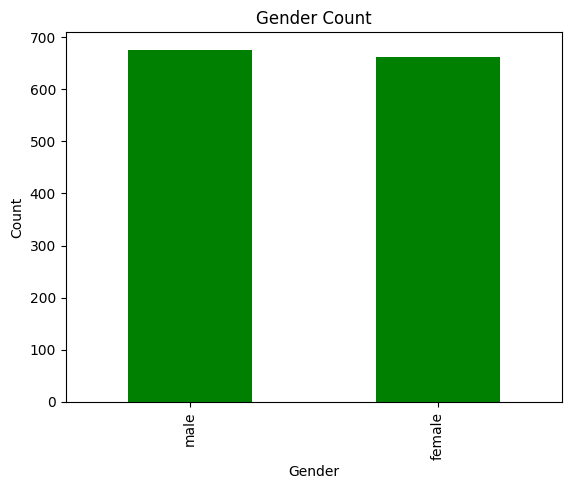

In [50]:
# visualize the count of gender column
df_cat['Gender'].value_counts().plot(kind='bar',color='green')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [51]:
# show the count of gender
df_cat['Gender'].value_counts()

,count
Gender,
male,676
female,662


In [52]:
# Interpretation
# In thsi data we have 676 male and 662 females insuarnce owner
# Data is quiet balanced

In [53]:
df_cat.columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [54]:
#Smoker

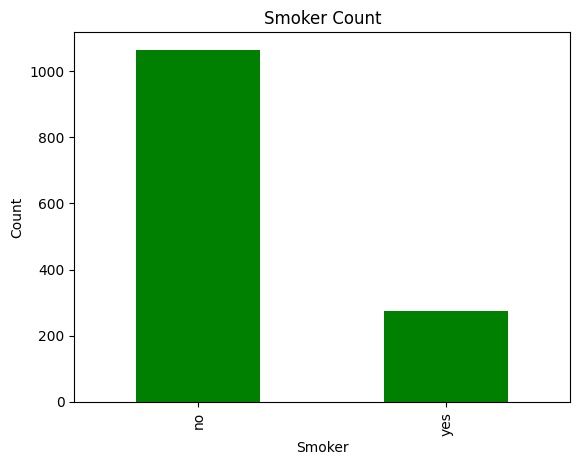

In [55]:
#visualize the count
df_cat['Smoker'].value_counts().plot(kind='bar',color='green')
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [56]:
#sjow the count
df_cat['Smoker'].value_counts()

,count
Smoker,
no,1064
yes,274


In [57]:
#Interpretation
# Number of non smokers is 1064 and smokers are 274
# Data is imbalanced

In [58]:
df_cat.columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [59]:
#Region

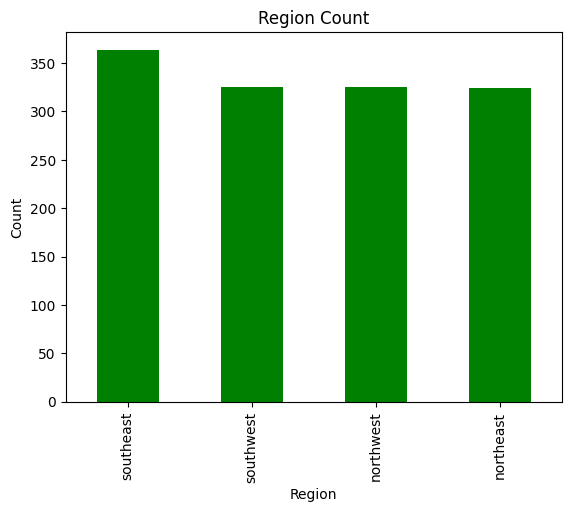

In [60]:
#visualize the count
df_cat['Region'].value_counts().plot(kind='bar',color='green',title='Region Count',xlabel='Region',ylabel='Count')
plt.show()

In [61]:
#show the count of region
df_cat['Region'].value_counts()

,count
Region,
southeast,364
southwest,325
northwest,325
northeast,324


In [62]:
#Interpretation
# Number insuarnce owners from southeast region are 364, from southwest region are 325, from northwest are 325 and from northeast are 324

In [63]:
# Bivariate Analysis

In [64]:
# step1: Finding the correlation matrix
df_num.corr()

,Age,BMI,Children,Charges
Age,1.000000,0.109272,0.042469,0.299008
BMI,0.109272,1.000000,0.012759,0.198341
Children,0.042469,0.012759,1.000000,0.067998
Charges,0.299008,0.198341,0.067998,1.000000


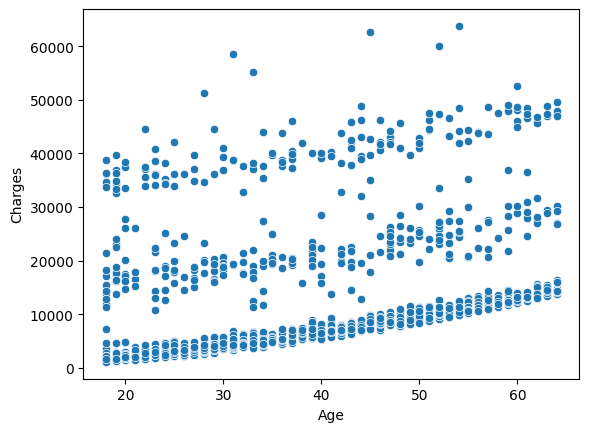

In [65]:
# For demo purpose: Consider age , charges having highest correlation. Lets plot it.
sns.scatterplot(x='Age',y='Charges',data=df_num)
plt.show()

In [66]:
# Do the bivariate analysis on one categorical and one numerical data


In [67]:
# show the categorical columns
df_cat.columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [68]:
# show the numerical columns
df_num.columns

Index(['Age', 'BMI', 'Children', 'Charges'], dtype='object')

In [69]:
# (Categorical,Numerical)
# (gender,age)
# (gender,BMI)
# (gender,childern)
# (gender,charges)

#(smoker,age)
#(smoker,BMI)
#(smoker,Childern)
#(smoker,charges)

#(region,age)
#(region,BMI)
#(region,Childern)
#(region,charges)

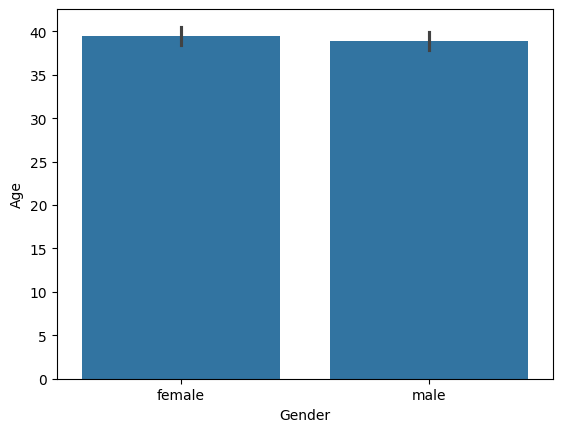

In [70]:
# (gender,age)
sns.barplot(x='Gender',y='Age',data=df_insurance,estimator='mean')
plt.show()

In [71]:
# Interpretation
# Avg age for female and male are balanced and it is approx 38,39

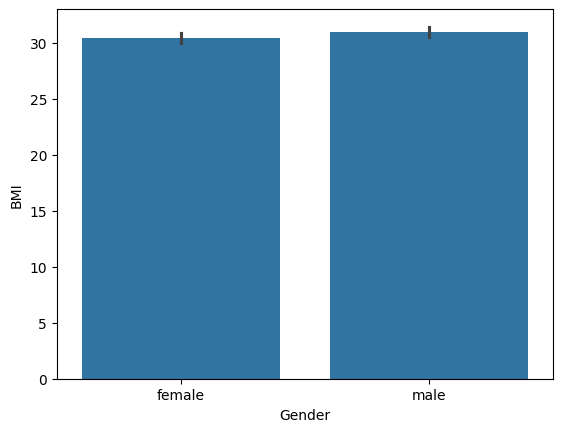

In [72]:
# (gender,BMI)
sns.barplot(x='Gender',y='BMI',data=df_insurance,estimator='mean')
plt.show()

In [73]:
#Interpretation
# The avg BMI for female and male is approx 40,41

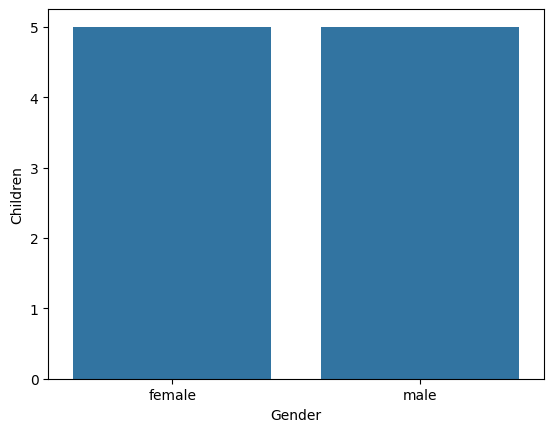

In [74]:
#gender,childern
sns.barplot(x='Gender',y='Children',data=df_insurance,estimator='max')
plt.show()

In [75]:
#Interpretation
# The max number of children an insurance owner have is approx 5

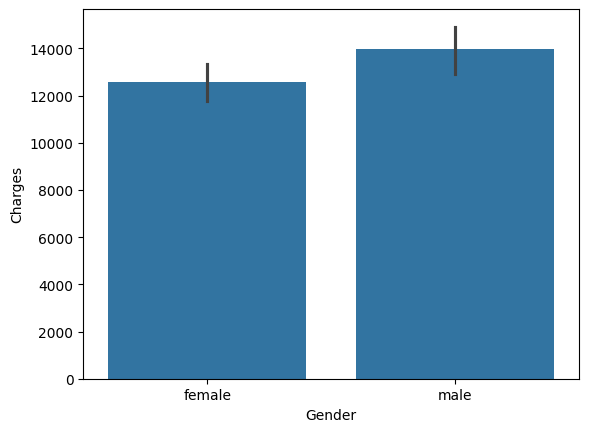

In [76]:
#gender,charges
sns.barplot(x='Gender',y='Charges',data=df_insurance,estimator='mean')
plt.show()

In [77]:
#Interpretation
# The avg charges on female are less compared to male
#The numbers are approx 12000 for female and approx 14000 for male

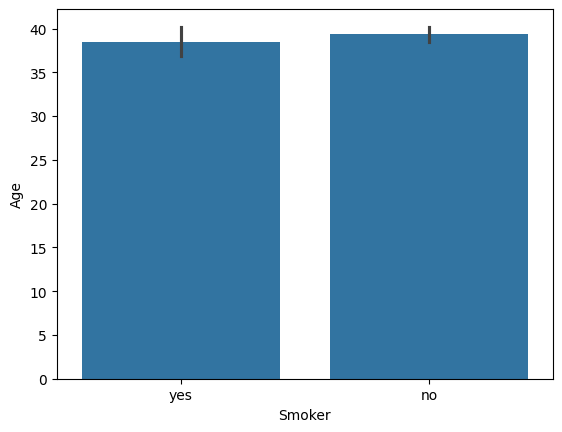

In [78]:
#smoker,age
sns.barplot(x='Smoker',y='Age',data=df_insurance,estimator='mean')
plt.show()

In [79]:
#Interpretation
#The avg smoker age is approx 38 and non smoker age is 39

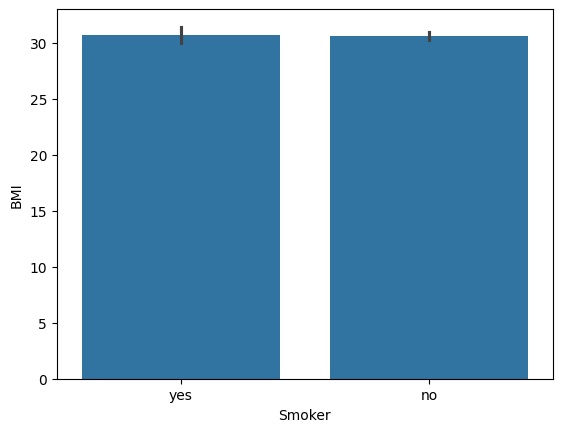

In [80]:
#Smoker,BMI
sns.barplot(x='Smoker',y='BMI',data=df_insurance,estimator='mean')
plt.show()

In [81]:
#Intrepretation
#The average BMI of owner who is a smoker and non smoker is balanced and it is about 30

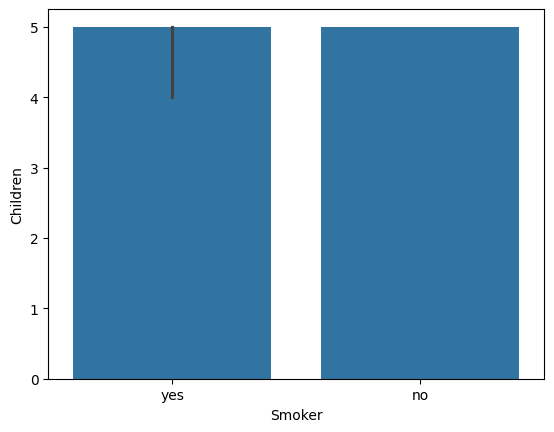

In [82]:
#Smoker, Children
sns.barplot(x='Smoker',y='Children',data=df_insurance,estimator='max')
plt.show()

In [83]:
#Interpretation
#The max no.of children a smoker and non-smoker have is 5 and the data is balanced

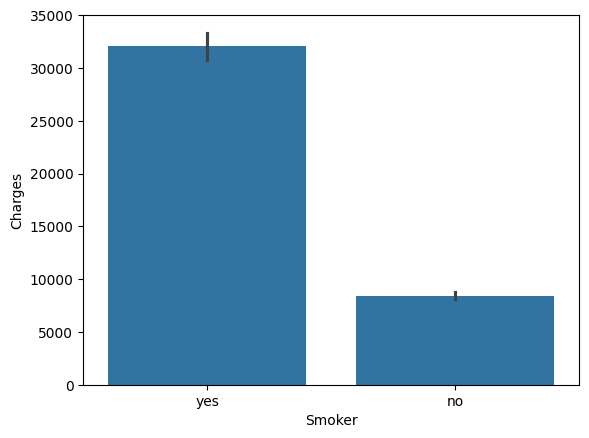

In [84]:
#Smoker,Charges
sns.barplot(x='Smoker',y='Charges',data=df_insurance,estimator='mean')
plt.show()

In [85]:
#Interpretation
#The avg charges on an owner who smokers is approx 32000 and an owner who doesn.t smoke is around 10000

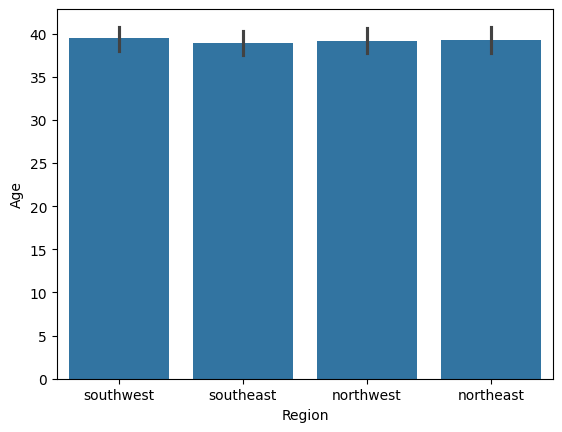

In [86]:
#region,age
sns.barplot(x='Region',y='Age',data=df_insurance,estimator='mean')
plt.show()

In [87]:
#Interpretation
#Data is balanced.The average age of onwer is around 40 from all regions

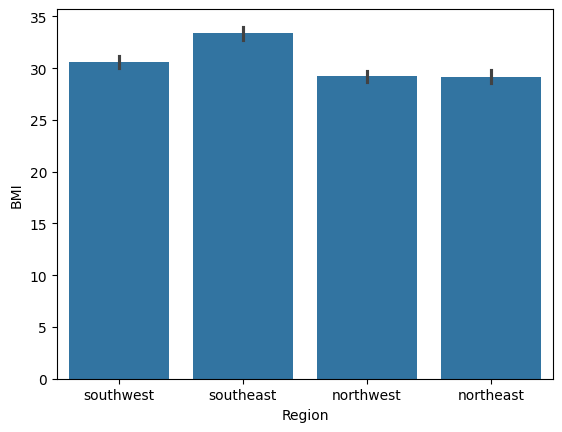

In [88]:
#Region,BMI
sns.barplot(x='Region',y='BMI',data=df_insurance,estimator='mean')
plt.show()

In [89]:
#Interpretation
#Data is almost balanced. The avg BMI of owners from southeast region is slightly more than other region owners and it is around 33.

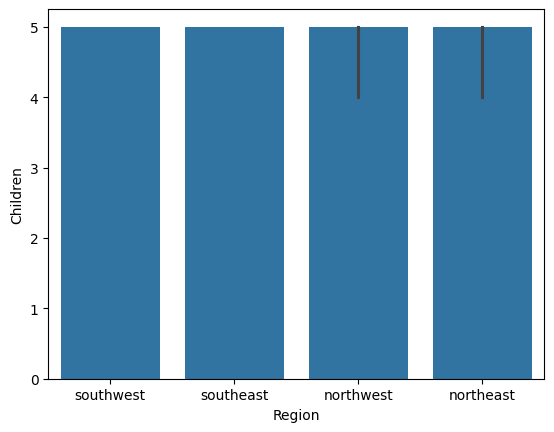

In [90]:
#Region, Children
sns.barplot(x='Region',y='Children',data=df_insurance,estimator='max')
plt.show()

In [91]:
#Interpretation
#Data is balanced.The max no.of children an insurance owner have from all regions are around 5

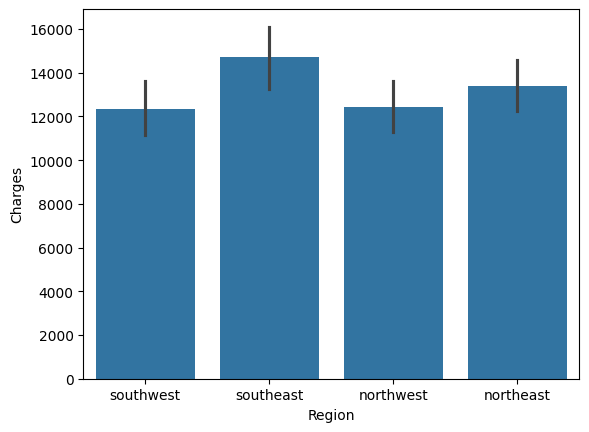

In [92]:
#Region,charges
sns.barplot(x='Region',y='Charges',data=df_insurance,estimator='mean')
plt.show()

In [93]:
#Interpretation
#Charges on southeast people are comparatively high around 14000+
#Charges imposed on southwest owners are around 12000
#Charges on northwest ppl are around 12000
#Charges on northeast region owners are around 12000

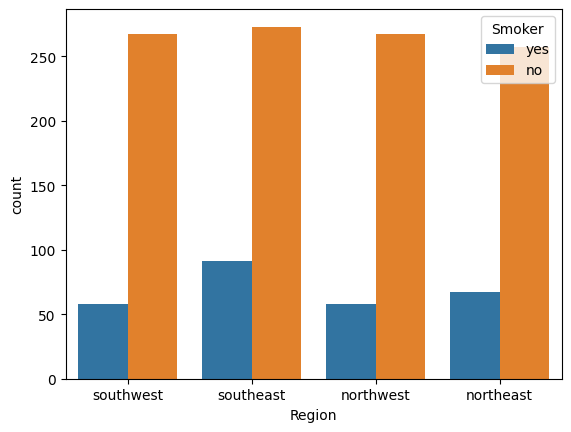

In [94]:
#Region,Smoker
sns.countplot(x='Region',hue='Smoker',data=df_insurance)
plt.show()

In [95]:
#Multivariate analysis

In [96]:
# When we use more than two columns for analytics is called multi variate analysis
# We need to make the pairs two categorical and one numerical.
# show the categorical columns
df_cat.columns

Index(['Gender', 'Smoker', 'Region'], dtype='object')

In [97]:
# Show the numerical col
df_num.columns


Index(['Age', 'BMI', 'Children', 'Charges'], dtype='object')

In [98]:
# Draw the pairs
# Gender,smoker,age
# gender, region,age
# smoker,region,age

# Gender,smoker,BMI
# gender, region,BMI
# smoker,region,BMI

# Gender,smoker,charges
# gender, region,charges
# smoker,region,charges

In [99]:
# Gender,smoker,age
# Draw the crosstab for the pair
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Smoker, values=df_insurance.Age,aggfunc='min')

Smoker,no,yes
Gender,,
female,18,18
male,18,18


In [100]:
# Draw the crosstab for the pair
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Smoker, values=df_insurance.Age,aggfunc='max')

Smoker,no,yes
Gender,,
female,64,64
male,64,64


In [101]:
# Draw the crosstab for the pair
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Smoker, values=df_insurance.Age,aggfunc='mean')

Smoker,no,yes
Gender,,
female,39.691042,38.608696
male,39.061896,38.446541


In [102]:
#Interpretation
# When the gender is female and she dont have smoking habit then the avg age is 39.691
# When the gender is female and she had the smoking habit, then the avg age is 38.608
# When gender is male and he dont have smoking habit, then the avg age is 39.061
# When gender is male and he have the smoking habit,then the avg age is 38.446

# When the gender is female and she dont have smoking habit then the min age is 18
# When the gender is female and she had the smoking habit, then the min age is 18
# When gender is male and he dont have smoking habit, then the avg min is 18
# When gender is male and he have the smoking habit,then the avg min is 18

# When the gender is female and she dont have smoking habit then the max age is 64
# When the gender is female and she had the smoking habit, then the max age is 64
# When gender is male and he dont have smoking habit, then the max age is 64
# When gender is male and he have the smoking habit,then the max age is 64


In [103]:
#Draw the cross tab for 2nd pair
#gender,region,age
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='mean')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,39.639752,39.591463,39.108571,39.703704
male,38.901840,38.795031,38.783069,39.208589


In [104]:
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='min')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,18,19,18,19
male,18,19,18,19


In [105]:
pd.crosstab(index=df_insurance.Gender, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='max')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,64,64,64,64
male,64,64,64,64


In [106]:
#Interpretation
# When the gender is female and she stayed in northeast then the avg age is 39.639
# When the gender is female and she stayed in northwast then the avg age is 39.591
# When the gender is female and she stayed in southeast then the avg age is 39.108
# When the gender is female and she stayed in southwest then the avg age is 39.703
# When the gender is male and he stayed in northeast then the avg age is 38.901
# When the gender is male and he stayed in northwest then the avg age is 38.795
# When the gender is male and he stayed in southeast then the avg age is 38.783
# When the gender is male and he stayed in southwest then the avg age is 39.208


# When the gender is female and she stayed in northeast then the min age is 18
# When the gender is female and she stayed in northwast then the min age is 19
# When the gender is female and she stayed in southeast then the min age is 18
# When the gender is female and she stayed in southwest then the min age is 19
# When the gender is male and he stayed in northeast then the min age is 18
# When the gender is male and he stayed in northwest then the min age is 19
# When the gender is male and he stayed in southeast then the min age is 18
# When the gender is male and he stayed in southwest then the min age is 19

# When the gender is female and she stayed in northeast then the max age is 64
# When the gender is female and she stayed in northwast then the max age is 64
# When the gender is female and she stayed in southeast then the max age is 64
# When the gender is female and she stayed in southwest then the max age is 64
# When the gender is male and he stayed in northeast then the avg max is 64
# When the gender is male and he stayed in northwest then the avg max is 64
# When the gender is male and he stayed in southeast then the avg max is 64
# When the gender is male and he stayed in southwest then the avg max is 64

In [107]:
#smoker,region,age
pd.crosstab(index=df_insurance.Smoker, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='max')


Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,64,64,64,64
yes,63,64,64,64


In [108]:
pd.crosstab(index=df_insurance.Smoker, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='min')


Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,18,19,18,19
yes,18,19,18,19


In [109]:
pd.crosstab(index=df_insurance.Smoker, columns=df_insurance.Region, values=df_insurance.Age,aggfunc='mean')


Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,39.536965,39.168539,38.673993,40.183521
yes,38.238806,39.327586,39.736264,36.103448


In [110]:
#Interpretation
#When the owner is a non smoker who lives in northeast region, then the avg age is 39.536
#When the owner is a non smoker who lives in northwest region, then the avg age is 39.168
#When the owner is a non smoker who lives in southeast region, then the avg age is 40.183
#When the owner is a  smoker who lives in northeast region, then the avg age is 38.238
#When the owner is a  smoker who lives in northwest region, then the avg age is 39.327
#When the owner is a  smoker who lives in southeast region, then the avg age is 39.736
#When the owner is a  smoker who lives in southwest region, then the avg age is 36.103


#When the owner is a smoker who lives in northeast region, then the min age is 18
#When the owner is a smoker who lives in northwest region, then the min age is 19
#When the owner is a smoker who lives in southeast region, then the min age is 18
#When the owner is a smoker who lives in southwest region, then the min age is 19
#When the owner is a non smoker who lives in northeast region, then the min age is 18
#When the owner is a non smoker who lives in northwest region, then the min age is 19
#When the owner is a non smoker who lives in southeast region, then the min age is 18
#When the owner is a non smoker who lives in southwest region, then the min age is 19

#When the owner is a smoker who lives in northeast region, then the max age is 63
#When the owner is a smoker who lives in northwest region, then the max age is 64
#When the owner is a smoker who lives in southeast region, then the max age is 64
#When the owner is a smoker who lives in southwest region, then the max age is 64
#When the owner is a non smoker who lives in northeast region, then the max age is 64
#When the owner is a non smoker who lives in northwest region, then the max age is 64
#When the owner is a non smoker who lives in southeast region, then the max age is 64
#When the owner is a non smoker who lives in southwest region, then the max age is 64

In [112]:
# Gender, Smoker, BMI
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.BMI,aggfunc='mean')

Smoker,no,yes
Gender,,
female,30.539525,29.608261
male,30.770580,31.504182


In [116]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.BMI,aggfunc='min')

Smoker,no,yes
Gender,,
female,16.815,17.195
male,15.960,17.290


In [119]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.BMI,aggfunc='max')

Smoker,no,yes
Gender,,
female,48.07,47.60
male,53.13,52.58


In [120]:
#Interpretation
# The avg age of a female smoker is 29.608
#The avg age of a female non-smoker is 30.539
#The avg age of a male smoker is 31.504
#The avg age of a male non-smoker is 30.770

# The min age of a female smoker is 17.195
#The min age of a female non-smoker is 16.815
#The min age of a male smoker is 17.290
#The min age of a male non-smoker is 15.960

# The max age of a female smoker is 47.60
#The max age of a female non-smoker is 48.07
#The max age of a male smoker is 52.58
#The max age of a male non-smoker is 53.13

In [124]:
# Gender, Region, BMI
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='mean')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,29.324317,29.277957,32.671257,30.060494
male,29.024540,29.120155,33.990000,31.129448


In [122]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='min')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,16.815,17.765,20.79,17.4
male,15.960,17.385,19.80,19.3


In [123]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='max')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,48.070,42.940,47.41,47.6
male,42.655,41.325,53.13,45.9


In [125]:
# Interpretation
#The avg BMI of a NE female and male are 29.324 and 29.024
#The avg BMI of a NW female and male are 29.277 and 29.120
#The avg BMI of a SE female and male are 29.324 and 32.671
#The avg BMI of a SW female and male are 29.277 and 33.990


#The min BMI of a NE female and male are 16.815 and 15.960
#The min BMI of a NW female and male are 17.765 and 17.38
#The min BMI of a SE female and male are 20.79 and 19.8
#The min BMI of a SW female and male are 17.4 and 19.3


#The max BMI of a NE female and male are 48.070 and 42.655
#The max BMI of a NW female and male are 42.940 and 41.325
#The max BMI of a SE female and male are 47.41 and 53.13
#The max BMI of a SW female and male are 47.6 and 45.9


In [126]:
# smoker,region,BMI
pd.crosstab(index=df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='mean')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,29.332082,29.212678,33.442418,30.507865
yes,28.565224,29.140431,33.096703,31.005172


In [127]:
pd.crosstab(index=df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='min')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,15.960,17.385,20.35,17.4
yes,17.195,17.765,19.80,18.3


In [128]:
pd.crosstab(index=df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.BMI,aggfunc='max')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,48.07,42.940,53.13,46.7
yes,42.75,40.565,52.58,47.6


In [130]:
# Interpretation
# The avg age of NE Smoker and non-smoker Owner is 28.565 and 29.332
# The avg age of NW Smoker and non-smoker  Owner is 29.140 and 29.212
# The avg age of SE Smoker and non-smoker  Owner is 33.096 and 33.441
# The avg age of SE Smoker and non-smoker  Owner is 31.005 and 31.005

# The min age of NE Smoker and non-smoker  Owner is 17.195 and 15.960
# The min age of NW Smoker and non-smoker  Owner is 17.765 and 17.385
# The min age of SE Smoker and non-smoker  Owner is 19.8 and 20.35
# The min age of SE Smoker and non-smoker  Owner is 18.3 and 17.4

# The max age of NE Smoker and non-smoker  Owner is 42.75 and 48.07
# The max age of NW Smoker and non-smoker  Owner is 40.565 and 42.940
# The max age of SE Smoker and non-smoker  Owner is 52.58 and 53.13
# The max age of SE Smoker and non-smoker  Owner is 47.6 and 46.7


In [131]:
# Gender,smoker,charges
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.Charges,aggfunc='mean')

Smoker,no,yes
Gender,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


In [132]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.Charges,aggfunc='min')

Smoker,no,yes
Gender,,
female,1607.5101,13844.5060
male,1121.8739,12829.4551


In [133]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Smoker,values=df_insurance.Charges,aggfunc='max')

Smoker,no,yes
Gender,,
female,36910.60803,63770.42801
male,32108.66282,62592.87309


In [134]:
# Interpretation
# Avg charges paid by female and male smoker are 30678.996 and 33042.005
# Avg charges paid by female and male non-smoker are 8762.297 and 8087.204

# min charges paid by female and male smoker are 13844.506 and 12829.455
# min charges paid by female and male non-smoker are 1607.51 and 1121.873

# max charges paid by female and male smoker are 63770.428 and 62592.873
# max charges paid by female and male non-smoker are 36910.608 and 32108.662

In [135]:
# gender, region, charges
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='mean')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,12953.203151,12479.870397,13499.669243,11274.411264
male,13854.005374,12354.119575,15879.617173,13412.883576


In [136]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='min')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,2196.4732,2117.33885,1607.5101,1727.785
male,1694.7964,1621.34020,1121.8739,1241.565


In [138]:
pd.crosstab(index=df_insurance.Gender,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='max')

Region,northeast,northwest,southeast,southwest
Gender,,,,
female,58571.07448,55135.40209,63770.42801,48824.45000
male,48549.17835,60021.39897,62592.87309,52590.82939


In [139]:
#INterpretation
#The max charges paid by NE female and male are 58571.074 and 48549.178
#The max charges paid by NW female and male are 55135.402 and 60021.398
#The max charges paid by SE female and male are 63770.428 and 62592.873
#The max charges paid by SW female and male are 48824.45 and 52590.829

#The min charges paid by NE female and male are 2196.47 and 1694.796
#The min charges paid by NW female and male are 2117.338 and 1621.340
#The min charges paid by SE female and male are 1607.510 and 1121.8739
#The min charges paid by SW female and male are 1727.785 and 1241.565

#The avg charges paid by NE female and male are 12953.203 and 13854.00
#The avg charges paid by NW female and male are 12479.870 and 12354.119
#The avg charges paid by SE female and male are 13499.669 and 15879.617
#The avg charges paid by SW female and male are 11274.411 and 13412.883

In [142]:
#smoker,region,charges
pd.crosstab(df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='mean')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,9165.531672,8556.463715,8032.216309,8019.284513
yes,29673.536473,30192.003182,34844.996824,32269.063494


In [143]:
pd.crosstab(df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='min')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,1694.7964,1621.3402,1121.8739,1241.565
yes,12829.4551,14711.7438,16577.7795,13844.506


In [144]:
pd.crosstab(df_insurance.Smoker,columns=df_insurance.Region,values=df_insurance.Charges,aggfunc='max')

Region,northeast,northwest,southeast,southwest
Smoker,,,,
no,32108.66282,33471.97189,36580.28216,36910.60803
yes,58571.07448,60021.39897,63770.42801,52590.82939


In [ ]:
#Interpretation
#The max charges paid by NE smoker is 58571.074
#The max charges paid by NE non-smoker is 32108.662
#The max charges paid by NW smoker is 60021.398
#The max charges paid by NW non-smoker is 33471.97
#The max charges paid by SE smoker is 63770.428
#The max charges paid by SE non-smoker is 36580.282
#The max charges paid by SW smoker is 52590.829
#The max charges paid by SW non-smoker is 36910.608


#The min charges paid by NE smoker is 12829.45
#The min charges paid by NE non-smoker is 1694.7964
#The min charges paid by NW smoker is 14711.743
#The min charges paid by NW non-smoker is 1621.340
#The min charges paid by SE smoker is 16577.779
#The min charges paid by SE non-smoker is 1121.873
#The min charges paid by SW smoker is 13844.506
#The min charges paid by SW non-smoker is 1241.565


#The avg charges paid by NE smoker is 29673.536
#The avg charges paid by NE non-smoker is 9165.531
#The avg charges paid by NW smoker is 30192.003
#The avg charges paid by NW non-smoker is 8556.463
#The avg charges paid by SE smoker is 34844.996
#The avg charges paid by SE non-smoker is 8032.216
#The avg charges paid by SW smoker is 32269.063
#The avg charges paid by SW non-smoker is 8019.2845
